In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# X = resources, probabilities (scale of 0-5 [D=0, 2,12 = 1, 3,11 = 2, 4,10 = 3, 5,9 = 4, 6,8 = 5])
# y = points

In [76]:
# CSV - modified to rename columns
data = pd.read_csv('resources/data_modified.csv')

# Remove un-needed columns
data = data.drop(columns=['gameNum','player','win','me','2','3','4','5','6','7','8','9','10','11','12',\
                          'production','tradeGain','robberCardsGain','totalGain','tradeLoss',\
                          'robberCardsLoss','tribute','totalLoss','totalAvailable',
                         '1_1_N','1_2_N','1_3_N','2_1_N','2_2_N','2_3_N'])

In [78]:
data.head()

,points,1_1_P,1_1_R,1_2_P,1_2_R,1_3_P,1_3_R,2_1_P,2_1_R,2_2_P,2_2_R,2_3_P,2_3_R
0,5,5,L,2,C,2,C,4,L,3,W,2,O
1,9,4,W,5,O,3,W,3,L,4,S,2,O
2,10,4,S,5,S,1,W,5,O,3,S,2,C
3,5,5,O,4,L,2,L,3,L,5,L,3,S
4,10,5,W,4,O,3,O,5,W,3,L,0,2L


In [79]:
# Pandas dummies convert to categorical
data = pd.get_dummies(data)

# Create list of column names
columns = []
for ea in data.columns:
    columns.append(ea)
# Pop 0th
columns.pop(0)

'points'

In [80]:
# Assign X (data) and y (target)
X = data[columns]
y = data['points'].values.reshape(-1,1)
print(X.shape, y.shape)

(200, 50) (200, 1)


In [81]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [82]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [83]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [84]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

In [85]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

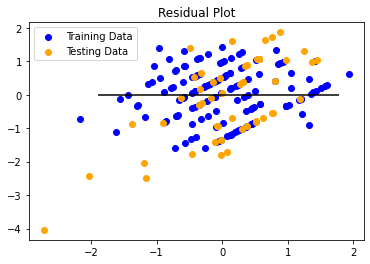

In [86]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [87]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.5826730861034712, R2: -0.8419761265579457


In [88]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2591632387858958, R2: -0.46546285878482974


In [89]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.2591632387858958, R2: -0.46546285878482974


In [90]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.303528110867412, R2: -0.5170964121379997
